<a href="https://colab.research.google.com/github/EvelynJimenez14/ARCHIVOS-ANALITO/blob/main/Copia_de_Matriz_corr_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

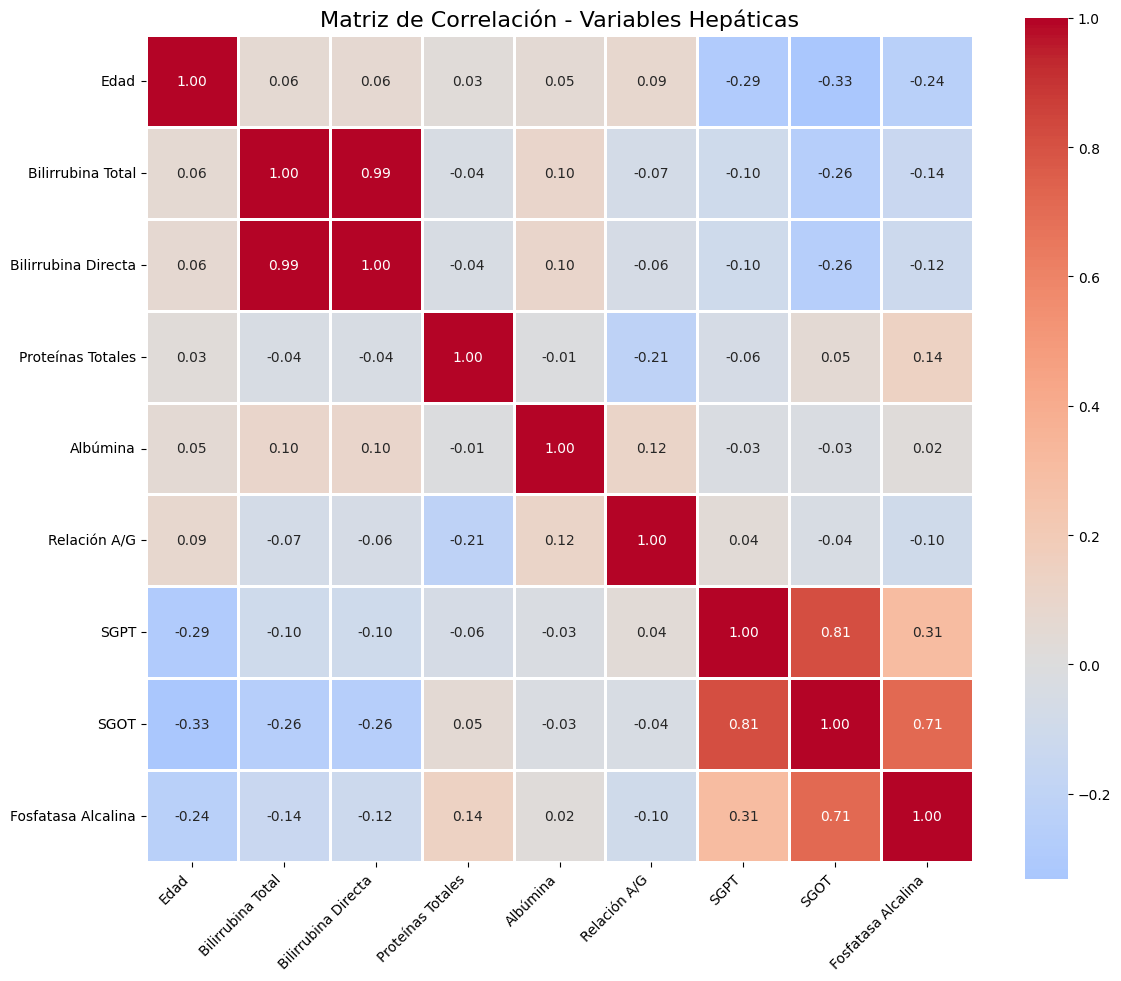

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
hepato=pd.read_csv('/content/drive/MyDrive/PROYECTO/ILPD_perfectly_cleaned.csv')

genero = hepato['gender']
age= hepato['age']
bilirubin_total = hepato['tot_bilirubin']
bilirubin_directa = hepato['direct_bilirubin']
proteinas_total = hepato['tot_proteins']
albumina = hepato['albumin']
ag_ratio = hepato['ag_ratio']
sgpt = hepato['sgpt']
sgot = hepato['sgot']
fosfatos = hepato['alkphos']
is_patient = hepato['is_patient']

variables = [
    'age',
    'tot_bilirubin',
    'direct_bilirubin',
    'tot_proteins',
    'albumin',
    'ag_ratio',
    'sgpt',
    'sgot',
    'alkphos'
]

etiquetas= [
    'Edad',
    'Bilirrubina Total',
    'Bilirrubina Directa',
    'Proteínas Totales',
    'Albúmina',
    'Relación A/G',
    'SGPT',
    'SGOT',
    'Fosfatasa Alcalina'
]

datos = {var: hepato[var] for var in variables}

def calcular_desviaciones(valores, promedio):
    desviaciones = []
    for valor in valores:
        desviacion = valor - promedio
        desviaciones.append(desviacion)
    return desviaciones

def calcular_suma_productos(lista1, lista2):
    suma = 0
    for i in range(len(lista1)):
        producto = lista1[i] * lista2[i]
        suma += producto
    return suma

def calcular_suma_cuadrados(lista):
    suma = 0
    for valor in lista:
        cuadrado = valor ** 2
        suma += cuadrado
    return suma

def calcular_raiz(numero):

    raiz = numero ** 0.5
    return raiz
def calcular_correlacion(x, y):

    x_limpio = x
    y_limpio = y

    n = len(x_limpio)
    if n < 2:
        return np.nan

    promedio_x = np.mean(x_limpio)
    promedio_y = np.mean(y_limpio)
    desviaciones_x = calcular_desviaciones(x_limpio, promedio_x)
    desviaciones_y = calcular_desviaciones(y_limpio, promedio_y)

    numerador = calcular_suma_productos(desviaciones_x, desviaciones_y)

    suma_cuadrados_x = calcular_suma_cuadrados(desviaciones_x)
    suma_cuadrados_y = calcular_suma_cuadrados(desviaciones_y)
    producto = suma_cuadrados_x * suma_cuadrados_y
    denominador = calcular_raiz(producto)

    if denominador == 0:
        return np.nan

    correlacion = numerador / denominador
    return correlacion
def crear_matriz_vacia(tam):
    matriz = []
    for i in range(tam):
        fila = []
        for j in range(tam):
            fila.append(0.0)
        matriz.append(fila)
    return matriz

def llenar_matriz(datos, variables):
    n = len(variables)
    matriz = crear_matriz_vacia(n)

    for i in range(n):
        for j in range(n):
            x = datos[variables[i]]
            y = datos[variables[j]]
            correlacion = calcular_correlacion(x, y)
            matriz[i][j] = correlacion

    return matriz
def convertir_a_dataframe(matriz, etiquetas):
    df = pd.DataFrame(matriz, index=etiquetas, columns=etiquetas)
    return df

def graficar_matriz(matriz):
    plt.figure(figsize=(12, 10))
    sns.heatmap(matriz,
                annot=True,
                fmt=".2f",
                cmap="coolwarm",
                center=0,
                square=True,
                linewidths=1)
    plt.title('Matriz de Correlación - Variables Hepáticas', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


n = len(variables)
matriz = llenar_matriz(datos, variables)
matriz_final = convertir_a_dataframe(matriz, etiquetas)
graficar_matriz(matriz_final)